In [5]:

#download yake library
!pip install yake
!pip urllib2

ERROR: unknown command "urllib2"


In [6]:
import yake
import pandas as pd
import requests
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [7]:
API_NYtimes = '[YOUR_API_KEY]'

In [8]:

mp_emailed = requests.get(f'https://api.nytimes.com/svc/mostpopular/v2/emailed/1.json?api-key={API_NYtimes}').json()
mp_shared = requests.get(f'https://api.nytimes.com/svc/mostpopular/v2/shared/1/facebook.json?api-key={API_NYtimes}').json()
mp_viewed = requests.get(f'https://api.nytimes.com/svc/mostpopular/v2/viewed/1.json?api-key={API_NYtimes}').json()

In [9]:
mp_emailed = pd.DataFrame(mp_emailed)
mp_shared = pd.DataFrame(mp_shared)
mp_viewed = pd.DataFrame(mp_viewed)


In [24]:
mp_viewed.head(20)

,status,copyright,num_results,results
0,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/3b4b2098-3f7b-5d44-aef5...
1,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/71f3dcfc-f609-5194-b35d...
2,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/b43c1a08-89fd-5e7f-900f...
3,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/a38d1252-581d-513d-b619...
4,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/161a58bc-01b1-5365-8d0b...
5,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/0ec9f9e7-a7a0-5184-b21a...
6,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/511ccfe5-52fa-5ba0-8249...
7,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/7c11b679-4532-5242-9b8b...
8,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/75448974-3e90-5764-9429...
9,OK,Copyright (c) 2022 The New York Times Company....,20,{'uri': 'nyt://article/a937e3d5-cc47-5401-856c...


In [11]:
# Extraction of main info from results
adx_keywords = []
abstract = []
des_facet = []
caption = []
org_facet = []
per_facet = []
title = []
published_date = []
url = []
for article in mp_emailed['results']:
    adx_keywords.append(article['adx_keywords']) 
    abstract.append(article['abstract'])
    des_facet.append(article['des_facet'])
    try:
        caption.append(article['media'][0]['caption'])
    except:
        caption.append(None)
    org_facet.append(article['org_facet'])
    per_facet.append(article['per_facet'])
    title.append(article['title'])
    published_date.append(article['published_date'])
    url.append(article['url'])
for article in mp_viewed['results']:
    adx_keywords.append(article['adx_keywords']) 
    abstract.append(article['abstract'])
    des_facet.append(article['des_facet'])
    try:
        caption.append(article['media'][0]['caption'])
    except:
        caption.append(None)
    org_facet.append(article['org_facet'])
    per_facet.append(article['per_facet'])
    title.append(article['title'])
    published_date.append(article['published_date'])
    url.append(article['url'])
for article in mp_shared['results']:
    adx_keywords.append(article['adx_keywords']) 
    abstract.append(article['abstract'])
    des_facet.append(article['des_facet'])
    try:
        caption.append(article['media'][0]['caption'])
    except:
        caption.append(None)
    org_facet.append(article['org_facet'])
    per_facet.append(article['per_facet'])
    title.append(article['title'])
    published_date.append(article['published_date'])
    url.append(article['url'])
# create table with extracted info

df_pop = pd.DataFrame()
df_pop['title'] = title
df_pop['published_date'] = published_date
df_pop['caption'] = caption
df_pop['abstract'] = abstract
df_pop['des_facet'] = des_facet
df_pop['org_facet'] = org_facet
df_pop['per_facet'] = per_facet
df_pop['adx_keywords'] = adx_keywords
df_pop['url'] = url

In [13]:
df_pop

,title,published_date,caption,abstract,des_facet,org_facet,per_facet,adx_keywords,url
0,The Webb Telescope Is Just Getting Started,2022-12-27,,"The first scientific results are coming in, an...","[James Webb Space Telescope, Hubble Space Tele...",[National Aeronautics and Space Administration...,[],James Webb Space Telescope;Hubble Space Telesc...,https://www.nytimes.com/2022/12/27/science/ast...
1,The Joy Workout,2022-05-24,,Six research-backed moves to improve your mood,"[Content Type: Service, Exercise, Emotions, Ha...",[],[],Content Type: Service;Exercise;Emotions;Happiness,https://www.nytimes.com/2022/05/24/well/move/j...
2,George Santos Admits to Lying About College an...,2022-12-26,Congressman-Elect George Santos at the Republi...,The congressman-elect confirmed The New York T...,"[United States Politics and Government, Midter...",[Republican Party],"[Santos, George (1988- )]",United States Politics and Government;Midterm ...,https://www.nytimes.com/2022/12/26/nyregion/ge...
3,Pandemic Woes Lead Met Opera to Tap Endowment ...,2022-12-26,"The Metropolitan Opera, which was once seen as...","Facing tepid ticket sales, the company will wi...","[Opera, Finances, Box Office Sales, Coronaviru...",[Metropolitan Opera],"[Gelb, Peter]",Opera;Finances;Box Office Sales;Coronavirus (2...,https://www.nytimes.com/2022/12/26/arts/music/...
4,The Best Way to Comfort Someone When They’re Sad,2022-12-23,,A limited yet growing body of research suggest...,"[Content Type: Service, Psychology and Psychol...",[],[],Content Type: Service;Psychology and Psycholog...,https://www.nytimes.com/2022/12/23/well/mind/s...
5,Small Steps to Improve Your Mental Health in 2023,2022-12-26,,Well’s most popular mental health stories of 2...,"[Mental Health and Disorders, Anxiety and Stre...",[],[],Mental Health and Disorders;Anxiety and Stress...,https://www.nytimes.com/2022/12/26/well/mind/m...
6,Arizona Is in a Race to the Bottom of Its Wate...,2022-12-26,,Arizona lawmakers must reform the state’s grou...,"[Water, Conservation of Resources, Global Warm...","[Almarai Co, Fondomonte Arizona LLC]",[],Water;Conservation of Resources;Global Warming...,https://www.nytimes.com/2022/12/26/opinion/ari...
7,Did the Tesla Story Ever Make Sense?,2022-12-27,,“Cool” doesn’t necessarily deliver sustained a...,"[Economics (Theory and Philosophy), internal-s...",[Tesla Motors Inc],"[Musk, Elon]",Economics (Theory and Philosophy);internal-sub...,https://www.nytimes.com/2022/12/27/opinion/tes...
8,An Old Medicine Grows New Hair for Pennies a D...,2022-08-18,"Brandy Gray, 44, was seen by Dr. Crystal Aguh ...",Dermatologists who specialize in hair loss say...,"[Hair, Baldness, Rogaine (Drug), Drugs (Pharma...",[],[],Hair;Baldness;Rogaine (Drug);Drugs (Pharmaceut...,https://www.nytimes.com/2022/08/18/health/mino...
9,Readers Share Their Favorite Books of 2022,2022-12-24,,New York Times readers recommend some of their...,"[Books and Literature, Two Thousand Twenty Two]",[],"[Garmus, Bonnie, Zevin, Gabrielle, Babalola, B...",Books and Literature;Two Thousand Twenty Two;G...,https://www.nytimes.com/2022/12/24/books/reade...


In [14]:
# a model that return a phrase that consists of one word
def def_keywords(text):
    kw_extractor = yake.KeywordExtractor()
    language = "en"
    max_ngram_size = 2
    deduplication_threshold = 0.9
    numOfKeywords = 30
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)
    keywords = [x for x in keywords if len(x[0].split(' ')) == 2]
    return ';'.join([x[0] for x in keywords])

# Exctract keywords from caption and abstract with model
df_pop['caption_kw'] = df_pop['caption'].apply(lambda x: def_keywords(x))
df_pop['abstract_kw'] = df_pop['abstract'].apply(lambda x: def_keywords(x))


Warning! Exception: object of type 'NoneType' has no len() generated by the following text: 'None' 
Warning! Exception: object of type 'NoneType' has no len() generated by the following text: 'None' 
Warning! Exception: object of type 'NoneType' has no len() generated by the following text: 'None' 
Warning! Exception: object of type 'NoneType' has no len() generated by the following text: 'None' 
Warning! Exception: object of type 'NoneType' has no len() generated by the following text: 'None' 
Warning! Exception: object of type 'NoneType' has no len() generated by the following text: 'None' 


In [15]:

# Create list with all keywords
words = []
for i in df_pop['adx_keywords']:
    for j in i.split(';'):
        words.append(j)

# count keywords and get 15 most frequent ones

counts = [words.count(x) for x in words]
df_heat = pd.DataFrame()
df_heat['words'] = words
df_heat['count'] = counts

df_heat.sort_values(by = 'count', ascending=False, inplace=True)
df_heat.drop_duplicates(inplace=True)
df_heat = df_heat.head(15)

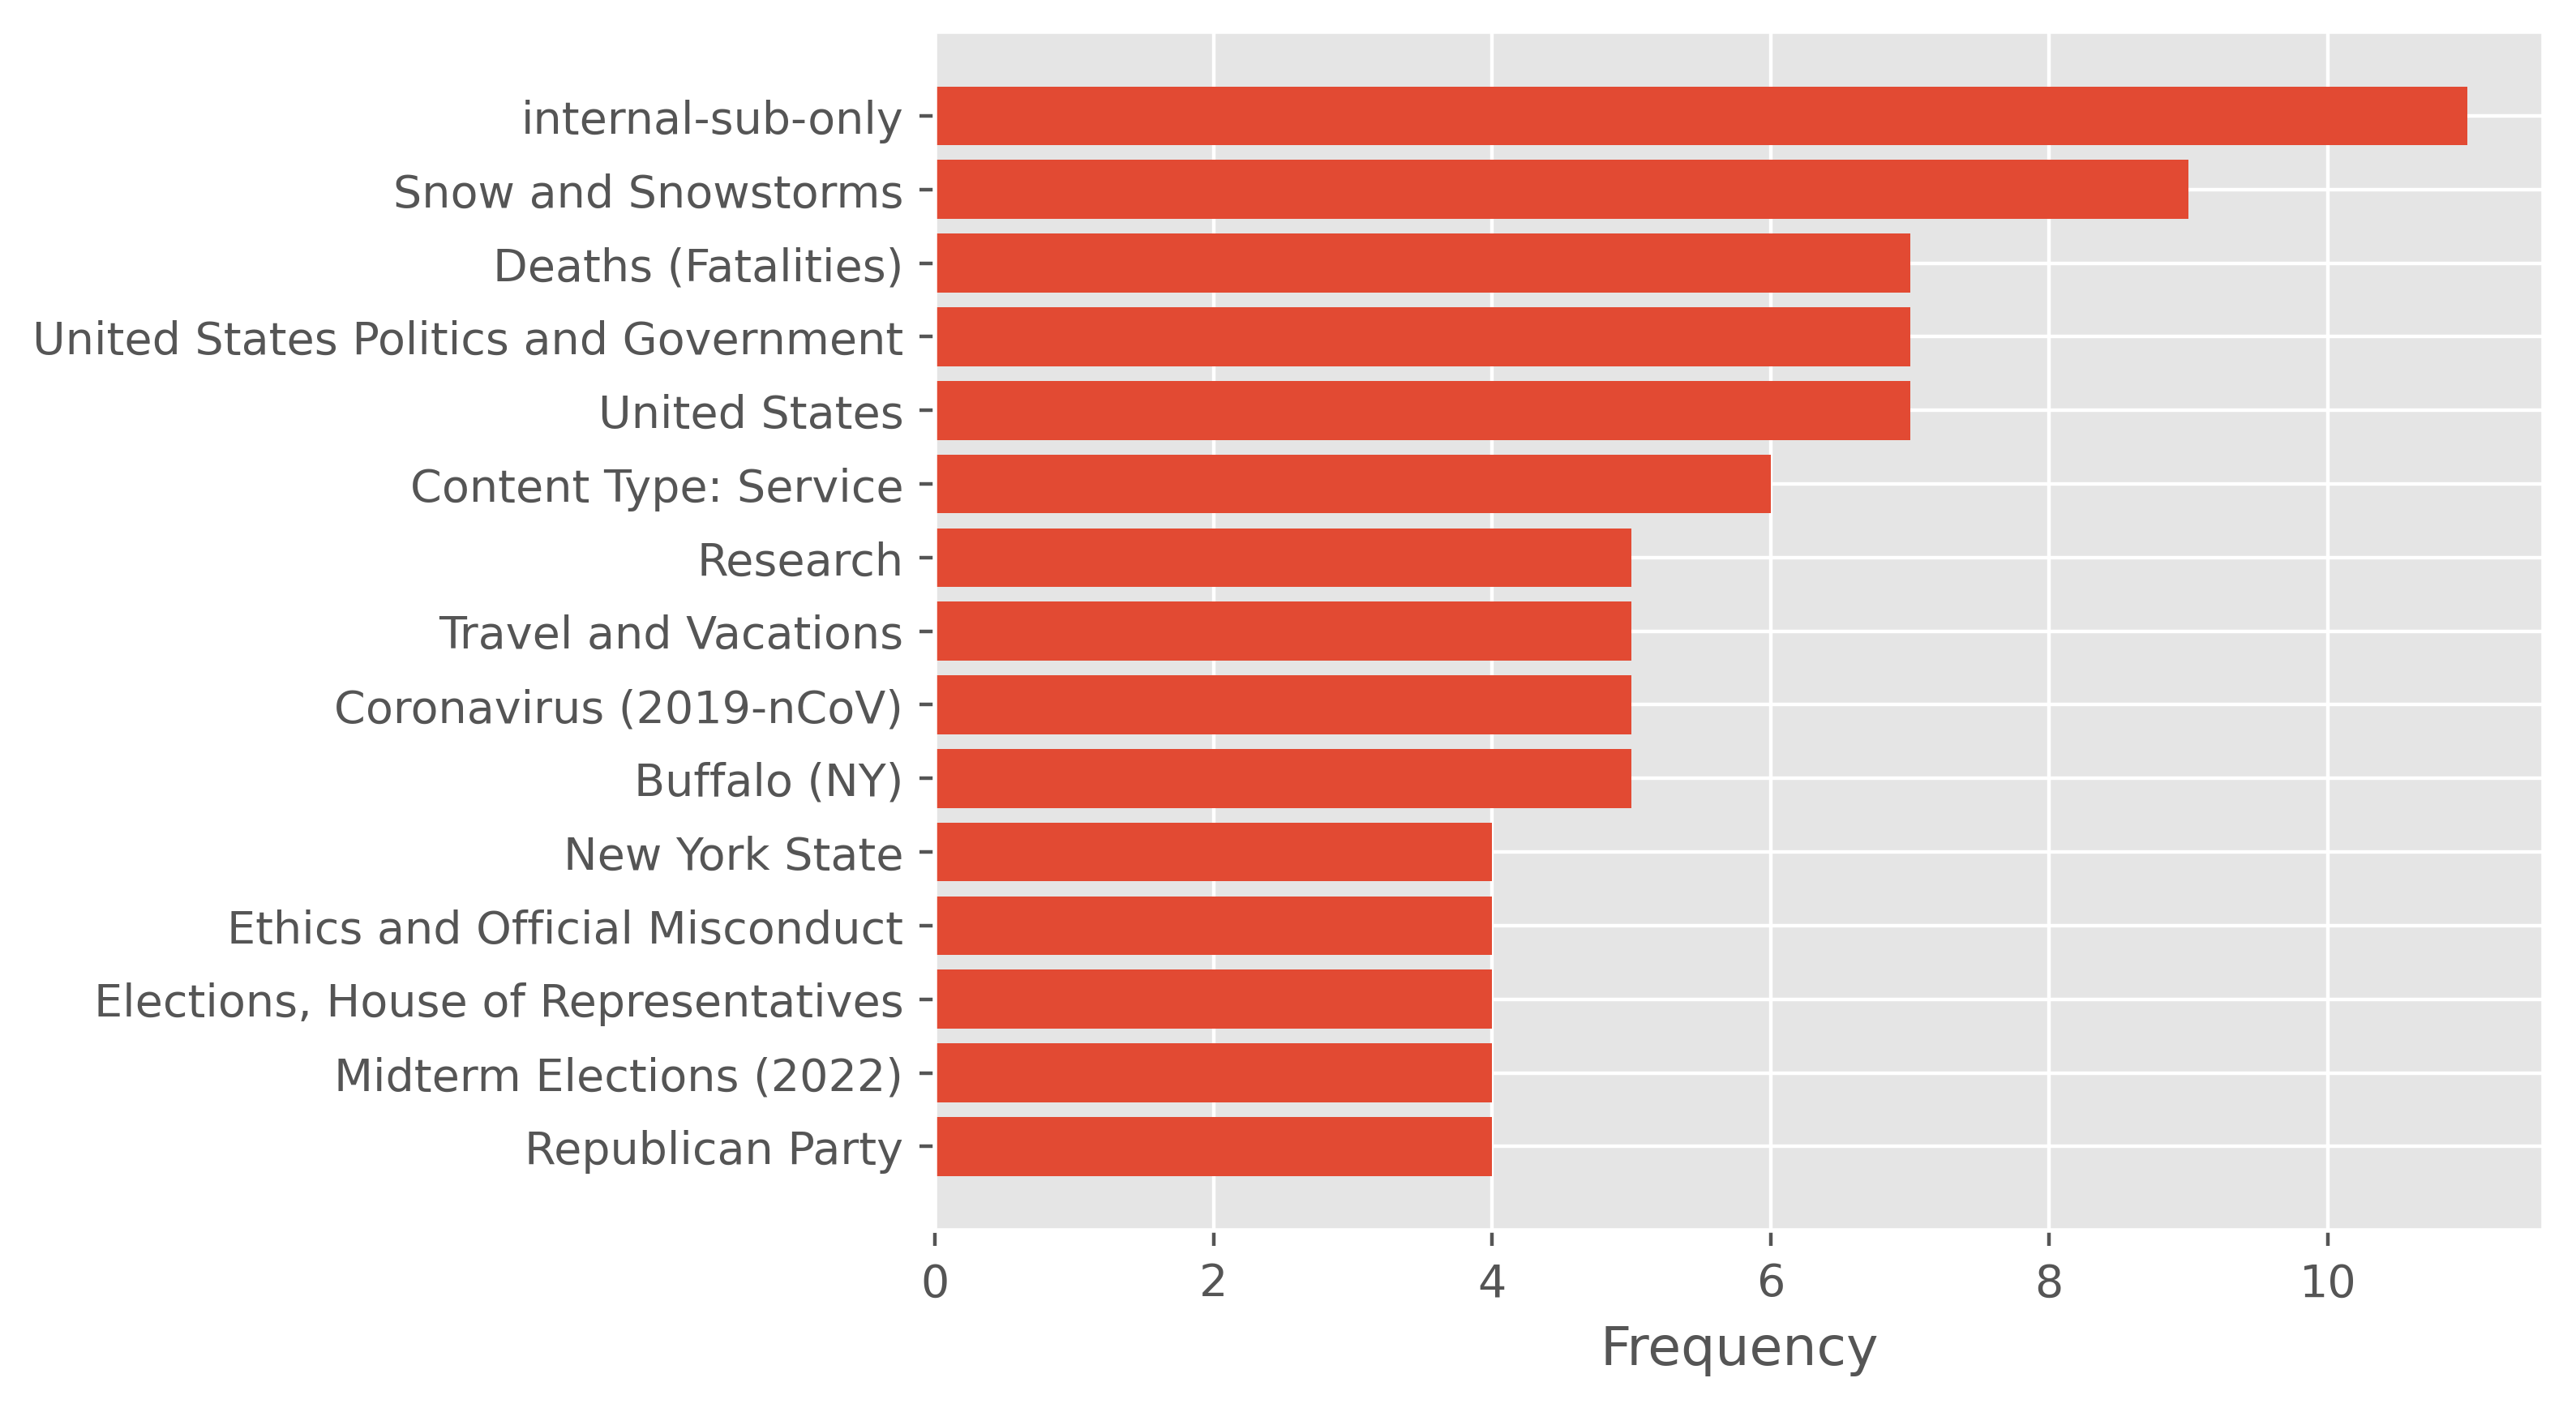

In [16]:

# Visualization of keywords frequancy

fig, ax = plt.subplots(dpi=400)
ax.barh(df_heat['words'], df_heat['count'], align='center')
y_pos = np.arange(len(df_heat['words']))
ax.set_yticks(y_pos)
ax.set_yticklabels(df_heat['words'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency')

plt.show()

In [17]:
#Keywords and context words 
# Context keywords frequency
df_w_heatmap = df_heat.copy()
kw_all = []
for i in df_pop['caption_kw']:
    for j in i.split(';'):
        kw_all.append(j)
for i in df_pop['abstract_kw']:
    for j in i.split(';'):
        kw_all.append(j)
kw_all = [x for x in kw_all if x != '']

kw_all_count = [kw_all.count(x) for x in kw_all]
kw_all_df = pd.DataFrame()
kw_all_df['kw'] = kw_all
kw_all_df['count'] = kw_all_count
kw_all_df.drop_duplicates(inplace=True)
kw_all_df.sort_values(by='count', ascending=False, inplace=True)
kw_all_df = kw_all_df.head(20)

df_pop.reset_index(drop=True, inplace=True)
all_w = []
def def_cw_cat(text):
    global all_w
    lst_cat = []
    index = 0
    while index < len(df_pop['title']):
        if text in df_pop['adx_keywords'][index]:
            for i in df_pop['caption_kw'][index].split(';'):
                lst_cat.append(i)
            for i in df_pop['abstract_kw'][index].split(';'):
                lst_cat.append(i)
        index += 1
    lst_cat = [x for x in lst_cat if x != '']
    c = Counter(lst_cat)
    all_w += [x[0] for x in c.most_common(5)]
    return c.most_common(5)
all_w = list(dict.fromkeys(all_w))
df_w_heatmap['cw_cat'] = df_w_heatmap['words'].apply(lambda x: def_cw_cat(x))

# Create dataframe for heatmap

df_w_heatmap.reset_index(drop=True, inplace=True)

for i in all_w:
    lst_df = []
    for j in df_w_heatmap['cw_cat']:
        add_lst = [x[1] for x in j if x[0] == i]
        if len([x for x in add_lst if x != '']) != 0:
            lst_df += add_lst
        else:
            lst_df.append('')
    df_w_heatmap[i] = lst_df
df_w_heatmap.index = df_w_heatmap['words']
df_w_heatmap.drop(['words', 'count', 'cw_cat'], 1, inplace=True)

/var/folders/h1/n_8zqg890x99r252y11xgmxr0000gn/T/ipykernel_2090/3366841702.py:55: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_w_heatmap.drop(['words', 'count', 'cw_cat'], 1, inplace=True)


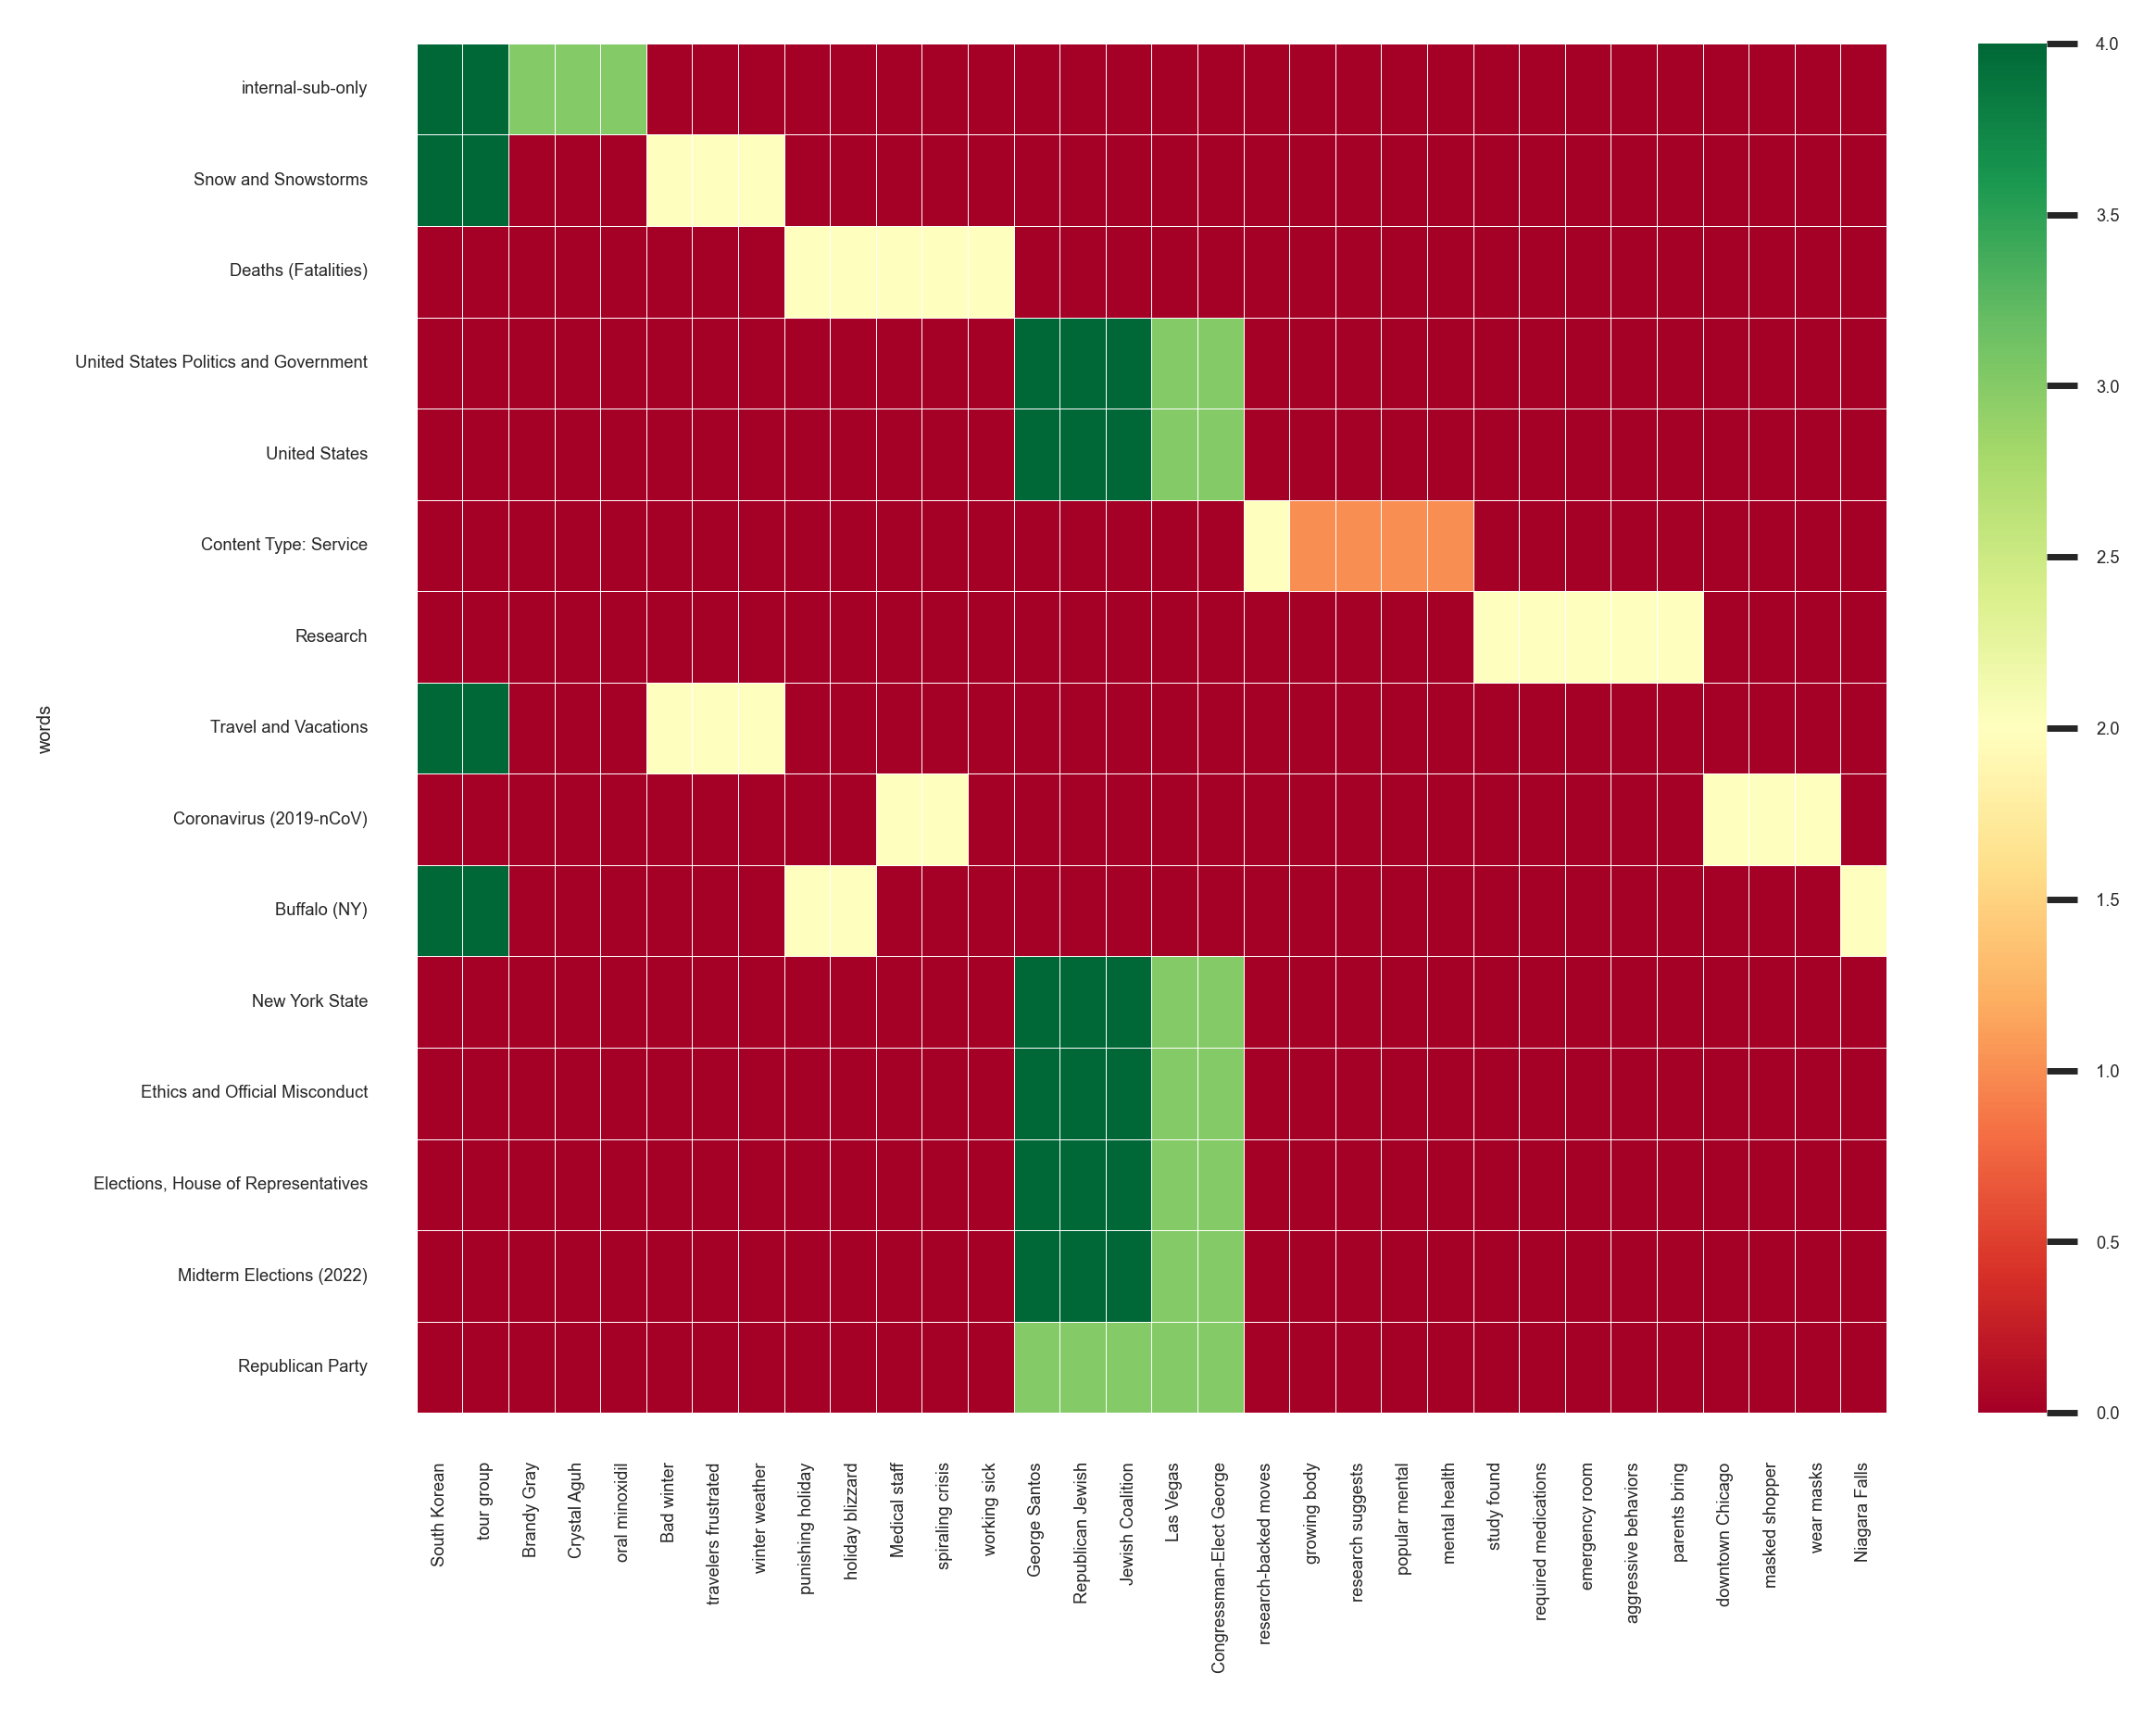

In [19]:

# Visualize heatmap
plt.figure(dpi = 400) 
sns.set(font_scale=0.3)
sns.heatmap(df_w_heatmap.replace('', 0), cmap='RdYlGn', fmt="", linewidths=0.1);

In [20]:
#Key persons
# Create list with all key persons
persons = []
for i in df_pop['per_facet']:
    try:
        for j in i[0].split(';'):
            persons.append(j)  
    except IndexError:
        pass

# count key persons and get 15 most frequent ones

count_per = [persons.count(x) for x in persons]
df_heat_per = pd.DataFrame()
df_heat_per['person'] = persons
df_heat_per['count'] = count_per

df_heat_per.drop_duplicates(inplace=True)
df_heat_per.sort_values(by='count', ascending=False, inplace=True)
df_heat_per = df_heat_per.head(15)
     

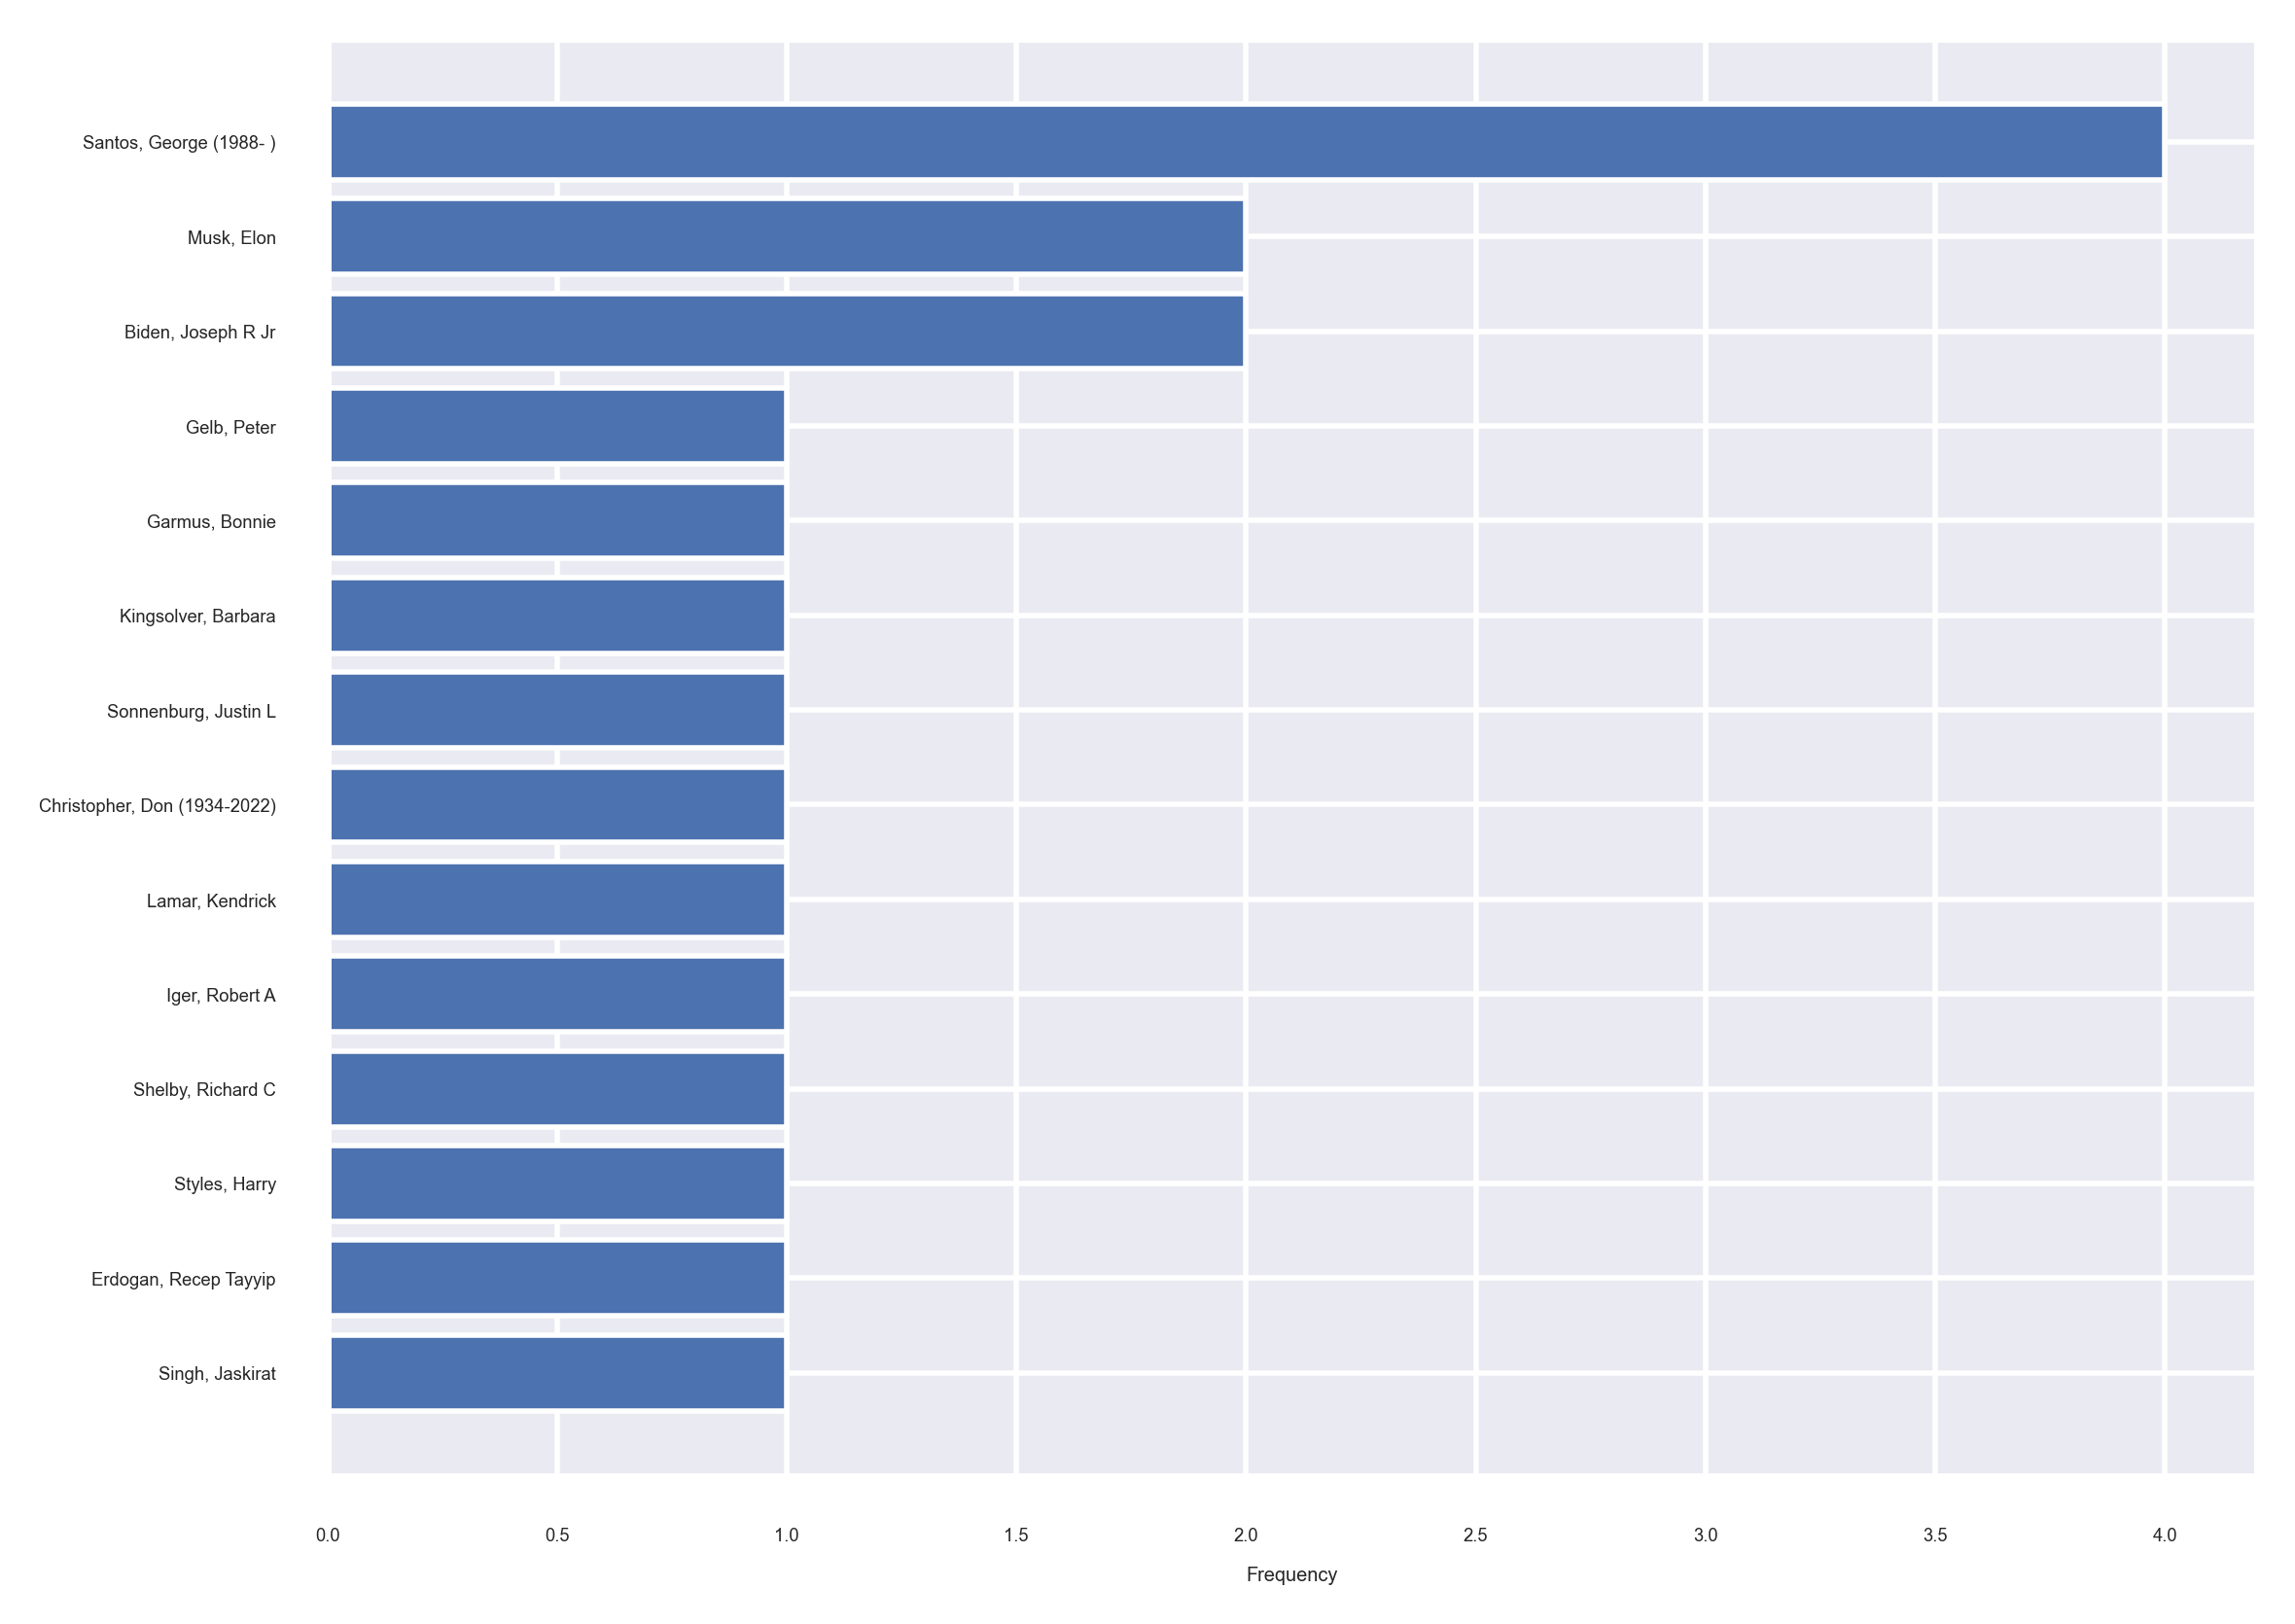

In [21]:
# Visualize key persons
fig, ax = plt.subplots(dpi=400)

ax.barh(df_heat_per['person'], df_heat_per['count'], align='center')
y_pos = np.arange(len(df_heat_per['person']))
ax.set_yticks(y_pos)
ax.set_yticklabels(df_heat_per['person'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency')

plt.show()

In [22]:

df_pop.to_csv("df_pop.csv")
pd.read_csv("df_pop.csv")

,Unnamed: 0,title,published_date,caption,abstract,des_facet,org_facet,per_facet,adx_keywords,url,caption_kw,abstract_kw
0,0,The Webb Telescope Is Just Getting Started,2022-12-27,NaN,"The first scientific results are coming in, an...","['James Webb Space Telescope', 'Hubble Space T...",['National Aeronautics and Space Administratio...,[],James Webb Space Telescope;Hubble Space Telesc...,https://www.nytimes.com/2022/12/27/science/ast...,NaN,billion instrument;scientific results
1,1,The Joy Workout,2022-05-24,NaN,Six research-backed moves to improve your mood,"['Content Type: Service', 'Exercise', 'Emotion...",[],[],Content Type: Service;Exercise;Emotions;Happiness,https://www.nytimes.com/2022/05/24/well/move/j...,NaN,research-backed moves
2,2,George Santos Admits to Lying About College an...,2022-12-26,Congressman-Elect George Santos at the Republi...,The congressman-elect confirmed The New York T...,"['United States Politics and Government', 'Mid...",['Republican Party'],"['Santos, George (1988- )']",United States Politics and Government;Midterm ...,https://www.nytimes.com/2022/12/26/nyregion/ge...,George Santos;Republican Jewish;Jewish Coaliti...,York Times;Wall Street;Street firms;major Wall...
3,3,Pandemic Woes Lead Met Opera to Tap Endowment ...,2022-12-26,"The Metropolitan Opera, which was once seen as...","Facing tepid ticket sales, the company will wi...","['Opera', 'Finances', 'Box Office Sales', 'Cor...",['Metropolitan Opera'],"['Gelb, Peter']",Opera;Finances;Box Office Sales;Coronavirus (2...,https://www.nytimes.com/2022/12/26/arts/music/...,Metropolitan Opera,Facing tepid;ticket sales;living composers;tep...
4,4,The Best Way to Comfort Someone When They’re Sad,2022-12-23,NaN,A limited yet growing body of research suggest...,"['Content Type: Service', 'Psychology and Psyc...",[],[],Content Type: Service;Psychology and Psycholog...,https://www.nytimes.com/2022/12/23/well/mind/s...,NaN,growing body;research suggests
5,5,Small Steps to Improve Your Mental Health in 2023,2022-12-26,NaN,Well’s most popular mental health stories of 2...,"['Mental Health and Disorders', 'Anxiety and S...",[],[],Mental Health and Disorders;Anxiety and Stress...,https://www.nytimes.com/2022/12/26/well/mind/m...,NaN,popular mental;mental health;health stories
6,6,Arizona Is in a Race to the Bottom of Its Wate...,2022-12-26,NaN,Arizona lawmakers must reform the state’s grou...,"['Water', 'Conservation of Resources', 'Global...","['Almarai Co', 'Fondomonte Arizona LLC']",[],Water;Conservation of Resources;Global Warming...,https://www.nytimes.com/2022/12/26/opinion/ari...,NaN,Arizona lawmakers;groundwater laws
7,7,Did the Tesla Story Ever Make Sense?,2022-12-27,NaN,“Cool” doesn’t necessarily deliver sustained a...,"['Economics (Theory and Philosophy)', 'interna...",['Tesla Motors Inc'],"['Musk, Elon']",Economics (Theory and Philosophy);internal-sub...,https://www.nytimes.com/2022/12/27/opinion/tes...,NaN,sustained advantage;n’t necessarily;necessaril...
8,8,An Old Medicine Grows New Hair for Pennies a D...,2022-08-18,"Brandy Gray, 44, was seen by Dr. Crystal Aguh ...",Dermatologists who specialize in hair loss say...,"['Hair', 'Baldness', 'Rogaine (Drug)', 'Drugs ...",[],[],Hair;Baldness;Rogaine (Drug);Drugs (Pharmaceut...,https://www.nytimes.com/2022/08/18/health/mino...,Brandy Gray;Crystal Aguh;oral minoxidil,low dose;hair loss;key ingredient;topical trea...
9,9,Readers Share Their Favorite Books of 2022,2022-12-24,NaN,New York Times readers recommend some of their...,"['Books and Literature', 'Two Thousand Twenty ...",[],"['Garmus, Bonnie', 'Zevin, Gabrielle', 'Babalo...",Books and Literature;Two Thousand Twenty Two;G...,https://www.nytimes.com/2022/12/24/books/reade...,NaN,York Times;Times readers;favorite books;reader...


In [23]:
rows = len(df_pop.axes[0])
cols = len(df_pop.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  60
Number of Columns:  11
